In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
df=pd.read_csv('C:/Users/nEW u/Desktop/nascom/Classified Data.csv',index_col=0)
df.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


In [23]:
df.describe()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [24]:
df.shape


(1000, 11)

# Standariaztion the data

As the data is present in the normal scale therefore to predict the model it has to be in the same scale to get more accuracy

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(df.drop(['TARGET CLASS'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaler_features=scaler.transform(df.drop(['TARGET CLASS'],axis=1))

In [29]:
df_feat=pd.DataFrame(scaler_features,columns=df.columns[:-1])

In [30]:
df_feat.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


# Data split train and test data

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(scaler_features,df['TARGET CLASS'], test_size=0.30)

# KNN classification for prediction

for predicting the data when k=1, we r taking k=1 just for checking

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
pred=knn.predict(X_test)

# Predictions and Evaluations

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92       155
          1       0.91      0.91      0.91       145

avg / total       0.91      0.91      0.91       300



In [49]:
print(confusion_matrix(y_test,pred))

[[142  13]
 [ 13 132]]


# Find the value of k

In [52]:
err_arr=[]

for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    p=knn.predict(X_test)
    err_arr.append(np.mean(p != y_test))

Text(0,0.5,'Error Rate')

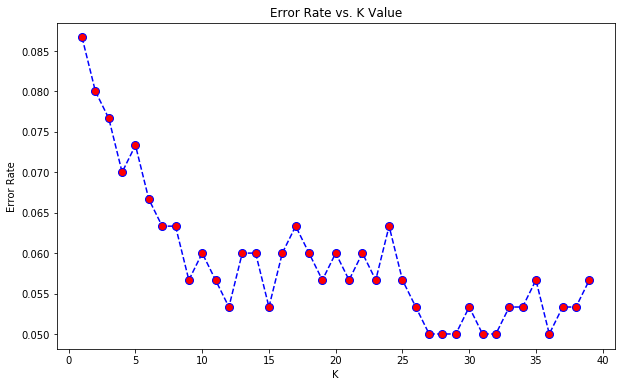

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_arr,color='blue', linestyle='dashed', marker='o',markersize=8,markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [74]:
k=KNeighborsClassifier(n_neighbors=28)
k.fit(X_train,y_train)
p1=knn.predict(X_test)

In [75]:

print(classification_report(y_test,p1))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95       155
          1       0.92      0.98      0.95       145

avg / total       0.95      0.95      0.95       300



In [77]:
q=confusion_matrix(y_test,p1)
print(confusion_matrix(y_test,p1))

[[143  12]
 [  3 142]]


Text(0.5,257.44,'Predicted label')

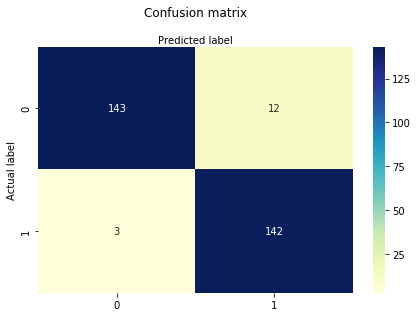

In [78]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(q), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')